# Etapa 2 e 3 Desafio

## Criação de scripts python que lê o CSV no S3 e gera 3 análises dos dados (Etapa 2), o resultado delas (seja um csv, png, jpg,) deve ser exportado para o S3 de volta (Etapa 3).

In [2]:
import boto3
import awswrangler as wr
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

session = boto3.Session(profile_name='pdroozi')
s3_client = session.client('s3')

bucket_name = 'meu-bucket-de-nome-unico-pedrogomesfigueiredo'
file_name = 'ProUniTrienio.csv'
local_path = '../data/ProUniTrienio.csv'
file_path_s3 = f's3://{bucket_name}/{file_name}'

df = wr.s3.read_csv(path=file_path_s3, boto3_session=session, sep=';')
print('Dataframe lido com sucesso')

df.columns = [unicodedata.normalize('NFKD', col).encode('ascii', errors='ignore').decode('utf-8').strip().upper() for col in df.columns]

dfteste = df.head()
dfteste.to_csv('../saida/dfteste.csv', index=False, sep=';')
print(dfteste)


Dataframe lido com sucesso
   ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA  \
0               2019.0                   10.0   
1               2019.0                   10.0   
2               2019.0                   10.0   
3               2019.0                   10.0   
4               2019.0                   10.0   

                               NOME_IES_BOLSA      TIPO_BOLSA  \
0  PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  BOLSA INTEGRAL   
1  PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  BOLSA INTEGRAL   
2  PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  BOLSA INTEGRAL   
3  PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  BOLSA INTEGRAL   
4  PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ  BOLSA INTEGRAL   

  MODALIDADE_ENSINO_BOLSA                       NOME_CURSO_BOLSA  \
0                     EAD                          Administração   
1                     EAD                          Administração   
2                     EAD  Análise E Desenvolvimento De Sistemas   
3              

### Análise 1 - Geográfica

Dataframe lido com sucesso


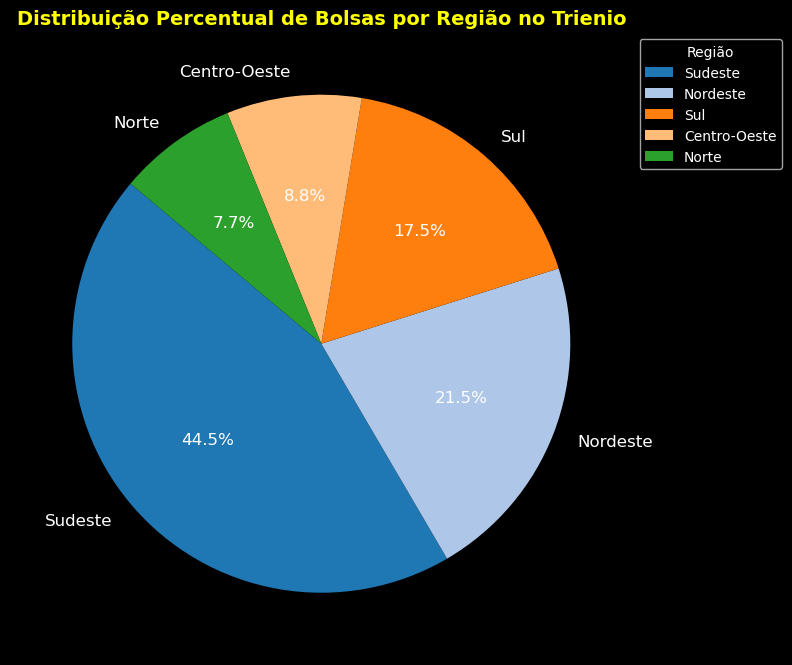

Arquivos 1 enviado com sucesso!
Arquivos 2 enviado com sucesso!


In [3]:
import boto3
import awswrangler as wr
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

session = boto3.Session(profile_name='pdroozi')
s3_client = session.client('s3')

bucket_name = 'meu-bucket-de-nome-unico-pedrogomesfigueiredo'
file_name = 'ProUniTrienio.csv'
local_path = '../data/ProUniTrienio.csv'
file_path_s3 = f's3://{bucket_name}/{file_name}'

df = wr.s3.read_csv(path=file_path_s3, boto3_session=session, sep=';')
print('Dataframe lido com sucesso')

df.columns = [unicodedata.normalize('NFKD', col).encode('ascii', errors='ignore').decode('utf-8').strip().upper() for col in df.columns]


df_regiao = df['REGIAO_BENEFICIARIO_BOLSA'].value_counts()

plt.style.use('dark_background') 
plt.figure(figsize=(8, 8))
plt.pie(df_regiao, labels= df_regiao.index,autopct='%1.1f%%',textprops={'fontsize': 12, 'color': 'white'}, startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribuição Percentual de Bolsas por Região no Trienio", fontsize=14, color='yellow', fontweight='bold')
plt.legend(title='Região', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.savefig('../saida/distribuicao_bolsas_por_regiao_trienio.png')
df_regiao.to_csv('../saida/distribuicao_bolsas_por_regiao_trienio.csv', index=True, header=True, sep=';')

plt.show()

s3_client.upload_file('../saida/distribuicao_bolsas_por_regiao_trienio.csv', bucket_name, 'distribuicao_bolsas_por_regiao_trienio.csv')
print("Arquivos 1 enviado com sucesso!")
s3_client.upload_file('../saida/distribuicao_bolsas_por_regiao_trienio.png', bucket_name, 'distribuicao_bolsas_por_regiao_trienio.png')
print("Arquivos 2 enviado com sucesso!")



### Análise 2 - Social

Dataframe lido com sucesso


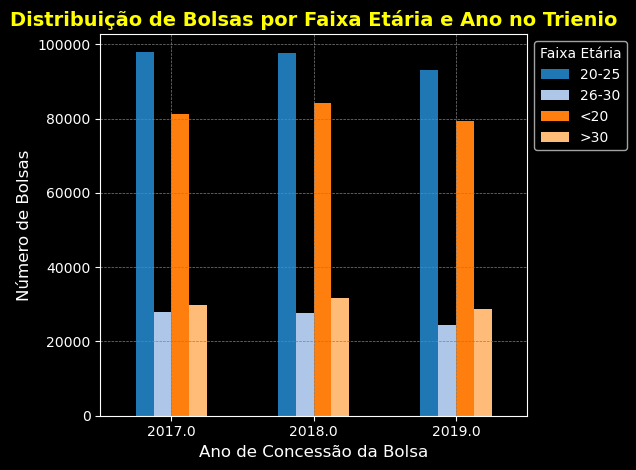

Arquivos 1 enviado com sucesso!
Arquivos 2 enviado com sucesso!


In [4]:
import boto3
import awswrangler as wr
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

session = boto3.Session(profile_name='pdroozi')
s3_client = session.client('s3')

bucket_name = 'meu-bucket-de-nome-unico-pedrogomesfigueiredo'
file_name = 'ProUniTrienio.csv'
local_path = '../data/ProUniTrienio.csv'
file_path_s3 = f's3://{bucket_name}/{file_name}'

df = wr.s3.read_csv(path=file_path_s3, boto3_session=session, sep=';')
print('Dataframe lido com sucesso')

df.columns = [unicodedata.normalize('NFKD', col).encode('ascii', errors='ignore').decode('utf-8').strip().upper() for col in df.columns]



def faixa_etaria(idade):
    if idade is None:
        return 'Desconhecida'
    elif idade < 20:
        return '<20'
    elif idade <= 25:
        return '20-25'
    elif idade <= 30:
        return '26-30'
    else:
        return '>30'

df['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(df['DT_NASCIMENTO_BENEFICIARIO'], errors='coerce', dayfirst=True)
df['IDADE_NO_ANO'] = df.apply(lambda row: row['ANO_CONCESSAO_BOLSA'] - row['DT_NASCIMENTO_BENEFICIARIO'].year if pd.notnull(row['DT_NASCIMENTO_BENEFICIARIO']) else None,axis=1)

df['FAIXA_ETARIA'] = df['IDADE_NO_ANO'].apply(faixa_etaria)

df_bolsa = df.groupby(['ANO_CONCESSAO_BOLSA', 'FAIXA_ETARIA']).size().unstack().fillna(0)
df_bolsa.plot(kind='bar', ax=plt.gca(), color=plt.cm.tab20.colors)


plt.style.use('dark_background') 
plt.title('Distribuição de Bolsas por Faixa Etária e Ano no Trienio', fontsize=14, color='yellow', fontweight='bold')
plt.xlabel('Ano de Concessão da Bolsa', fontsize=12, color='white')
plt.ylabel('Número de Bolsas', fontsize=12, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=0)
plt.legend(title='Faixa Etária', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.savefig('../saida/distribuicao_bolsas_por_faixa_etaria_trienio.png')
df_bolsa.to_csv('../saida/distribuicao_bolsas_por_faixa_etaria_trienio.csv', index=True, header=True, sep=';')

plt.show()

s3_client.upload_file('../saida/distribuicao_bolsas_por_faixa_etaria_trienio.csv', bucket_name, 'distribuicao_bolsas_por_faixa_etaria_trienio.csv')
print("Arquivos 1 enviado com sucesso!")
s3_client.upload_file('../saida/distribuicao_bolsas_por_faixa_etaria_trienio.png', bucket_name, 'distribuicao_bolsas_por_faixa_etaria_trienio.png')
print("Arquivos 2 enviado com sucesso!")

### Análise 3 - Demográfica

Dataframe lido com sucesso


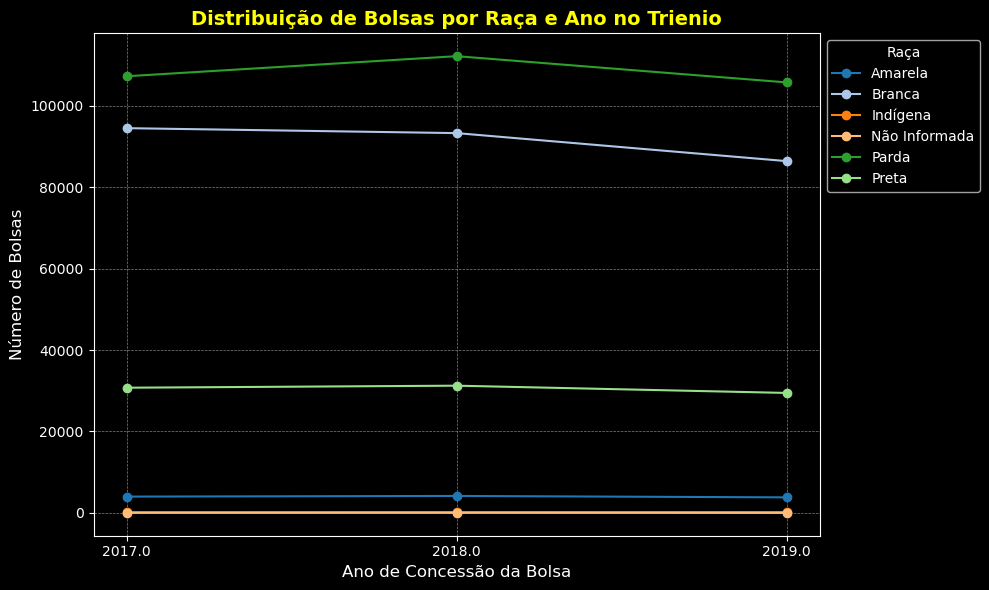

Arquivos 1 enviado com sucesso!
Arquivos 2 enviado com sucesso!


In [5]:
import boto3
import awswrangler as wr
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

session = boto3.Session(profile_name='pdroozi')
s3_client = session.client('s3')

bucket_name = 'meu-bucket-de-nome-unico-pedrogomesfigueiredo'
file_name = 'ProUniTrienio.csv'
local_path = '../data/ProUniTrienio.csv'
file_path_s3 = f's3://{bucket_name}/{file_name}'

df = wr.s3.read_csv(path=file_path_s3, boto3_session=session, sep=';')
print('Dataframe lido com sucesso')

df.columns = [unicodedata.normalize('NFKD', col).encode('ascii', errors='ignore').decode('utf-8').strip().upper() for col in df.columns]


df_raca = df.groupby(['ANO_CONCESSAO_BOLSA', 'RACA_BENEFICIARIO_BOLSA']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))

for coluna in df_raca.columns:
    plt.plot(df_raca.index, df_raca[coluna], marker='o', label=coluna, color=plt.cm.tab20.colors[df_raca.columns.get_loc(coluna) % 20])

plt.title('Distribuição de Bolsas por Raça e Ano no Trienio', fontsize=14, color='yellow', fontweight='bold')
plt.xlabel('Ano de Concessão da Bolsa', fontsize=12, color='white')
plt.ylabel('Número de Bolsas', fontsize=12, color='white')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xticks(ticks=df_raca.index.unique(), labels=df_raca.index.unique(), rotation=0, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.legend(title='Raça', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.savefig('../saida/distribuicao_bolsas_por_raca_trienio.png', facecolor='black')
df_raca.to_csv('../saida/distribuicao_bolsas_por_raca_trienio.csv', index=True, header=True, sep=';')

plt.show()

s3_client.upload_file('../saida/distribuicao_bolsas_por_raca_trienio.csv', bucket_name, 'distribuicao_bolsas_por_raca_trienio.csv')
print("Arquivos 1 enviado com sucesso!")
s3_client.upload_file('../saida/distribuicao_bolsas_por_raca_trienio.png', bucket_name, 'distribuicao_bolsas_por_raca_trienio.png')
print("Arquivos 2 enviado com sucesso!")
